In [1]:
!pip install ultralytics
!pip install opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 28.1 MB/s eta 0:00:00


In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9EqXAAWbHPj52LFkeOyC")
project = rf.workspace("abc-tqokv").project("food_calorie_detection")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to food_calorie_detection-4 in yolov8:: 100%|██████████| 1462/1462 [00:00<00:00, 3388.06it/s]


In [4]:
model = YOLO('yolov8x.pt')


100%|██████████| 131M/131M [00:02<00:00, 59.7MB/s]


In [5]:
# Train the model
model.train(
    data='/content/food_calorie_detection-4/data.yaml',  # Path to your dataset YAML file
    epochs=150,  # Number of epochs
    imgsz=640,   # Image size
    batch=16,    # Batch size
    lr0=0.001,  # Initial learning rate
    optimizer='Adam',  # Use Adam optimizer
    device='0'     # Set to 'cpu' or '0' for GPU
)


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/food_calorie_detection-4/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 35.0MB/s]


Overriding model.yaml nc=80 with nc=53

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 186MB/s]


AMP: checks passed ✅


train: Scanning /content/food_calorie_detection-4/train/labels... 714 images, 0 backgrounds, 0 corrupt: 100%|██████████| 714/714 [00:00<00:00, 1271.48it/s]

train: New cache created: /content/food_calorie_detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/food_calorie_detection-4/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 311.18it/s]

val: New cache created: /content/food_calorie_detection-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      13.4G     0.7453      2.977      1.197         86        640: 100%|██████████| 45/45 [01:01<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          7         37      0.276      0.408      0.259      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      13.2G     0.7412      2.089      1.186         76        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          7         37      0.219      0.496       0.25      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      13.5G     0.7702      1.956      1.217         86        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          7         37      0.748      0.112      0.153     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      13.5G     0.7445       1.76      1.194         74        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          7         37      0.411      0.275      0.223      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      13.3G     0.7071      1.605      1.168        100        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          7         37      0.348      0.275      0.269      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      13.6G     0.6915      1.531      1.171         98        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          7         37      0.357      0.389      0.271      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      13.5G     0.6566       1.42      1.138         91        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          7         37      0.336      0.522      0.394      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      13.5G      0.627      1.353      1.111         77        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          7         37      0.603      0.305      0.253      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      13.3G     0.5898      1.233       1.09         70        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all          7         37      0.283      0.382      0.382      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      13.6G     0.5869      1.158      1.088        108        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          7         37      0.638      0.288      0.381      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      13.5G     0.5721      1.148      1.074         94        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          7         37      0.372      0.399      0.349      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      13.5G     0.5633      1.098      1.066         79        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          7         37      0.648      0.441      0.512      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      13.3G     0.5443     0.9899      1.058        105        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          7         37      0.283      0.462      0.421      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      13.6G     0.5179      0.952      1.044         83        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7         37      0.378      0.411       0.41      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      13.5G     0.5334     0.9258      1.053         83        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          7         37      0.551      0.396      0.406      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      13.5G     0.5265     0.8922      1.049         99        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          7         37      0.599      0.377      0.521       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      13.3G     0.5007     0.8659      1.026         88        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          7         37      0.519      0.476      0.433      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      13.6G     0.4947     0.8624      1.027         92        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          7         37      0.479      0.402       0.49      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      13.5G     0.4928     0.8403       1.02         77        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all          7         37      0.616      0.462      0.538      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      13.5G      0.476     0.7965      1.023         90        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all          7         37      0.403      0.537       0.53      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      13.3G     0.4563     0.7387      1.003        105        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7         37      0.508      0.528       0.54      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      13.6G      0.466     0.7464      1.008         87        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7         37      0.548      0.561      0.581      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      13.5G     0.4564     0.7019      1.002         75        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.418      0.458      0.502      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      13.5G     0.4507     0.6971      0.996         86        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          7         37      0.481       0.47      0.473      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      13.3G     0.4325     0.6729     0.9804         74        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          7         37      0.483      0.485      0.445      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      13.6G     0.4483      0.694     0.9959         95        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all          7         37      0.553      0.448      0.428      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      13.5G     0.4287     0.6417     0.9797         91        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          7         37       0.21      0.775      0.538      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      13.5G     0.4317     0.6397     0.9756         93        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          7         37      0.416      0.603      0.436      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      13.3G     0.4149     0.6218     0.9738         75        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7         37      0.365      0.479      0.484       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      13.6G     0.4021     0.6099     0.9737         96        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7         37      0.439      0.435      0.542       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      13.5G     0.4003      0.592      0.967        103        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          7         37      0.393      0.399      0.402      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      13.5G     0.4042     0.5831     0.9716        116        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7         37       0.33      0.512      0.461      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      13.3G     0.4007     0.5701     0.9626         87        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          7         37      0.392      0.449      0.467      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      13.6G     0.4114     0.5714     0.9729         77        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          7         37       0.52      0.518      0.535      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      13.5G      0.392     0.5715      0.957        101        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all          7         37      0.579      0.416      0.479      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      13.5G     0.3856     0.5669     0.9559         68        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          7         37      0.245      0.637      0.438      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      13.3G     0.3865     0.5586     0.9509         82        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          7         37      0.534      0.429      0.511      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      13.6G     0.3778     0.5329     0.9551         83        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          7         37      0.663      0.409      0.544      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      13.5G     0.3779     0.5212      0.946         91        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          7         37      0.563      0.516       0.54      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      13.5G     0.3696     0.5052     0.9464         75        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          7         37      0.586      0.476      0.545      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      13.3G     0.3705     0.5072      0.944         83        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          7         37      0.223      0.833      0.562      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      13.6G     0.3603     0.5128     0.9374         89        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          7         37       0.56      0.442      0.506      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      13.5G     0.3576     0.4938     0.9423         80        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          7         37      0.579      0.469      0.509      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      13.5G     0.3594     0.4963     0.9417         86        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          7         37      0.556      0.641      0.582      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      13.2G     0.3569     0.4751     0.9343         69        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7         37      0.533      0.491      0.554      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      13.6G     0.3577     0.4678      0.938         88        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all          7         37      0.439      0.546      0.547      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      13.5G     0.3397       0.45     0.9276         81        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          7         37      0.427      0.455      0.419      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      13.5G     0.3525     0.4703     0.9371         99        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7         37      0.692      0.388      0.465      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      13.3G     0.3392      0.446     0.9287         81        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all          7         37      0.485      0.482      0.489      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      13.6G     0.3401     0.4577     0.9312        127        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          7         37       0.51      0.455      0.505      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      13.5G     0.3367     0.4407     0.9289         87        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          7         37      0.606      0.455      0.521      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      13.5G     0.3388     0.4499     0.9319        106        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          7         37      0.224       0.71      0.454      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      13.2G     0.3296     0.4273     0.9234         94        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all          7         37      0.195      0.696      0.473      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      13.6G     0.3242     0.4054     0.9173         98        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all          7         37      0.454      0.606      0.624      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      13.5G     0.3352     0.4136     0.9354         78        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          7         37      0.565      0.488      0.484      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      13.5G      0.325     0.4041     0.9225        119        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          7         37      0.509      0.428       0.45      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      13.2G     0.3397     0.4334     0.9388         75        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          7         37      0.373      0.562      0.505      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      13.6G     0.3205     0.4076     0.9219        107        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all          7         37      0.466      0.429      0.461      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      13.5G     0.3196     0.4052     0.9147        123        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          7         37      0.701      0.345      0.493      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      13.5G     0.3224     0.4112     0.9231         84        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7         37      0.694      0.411      0.457      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      13.3G     0.3264     0.4101     0.9226        111        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          7         37      0.456      0.547       0.56      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      13.6G       0.32     0.4075     0.9231         75        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all          7         37      0.644      0.438      0.526      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      13.5G     0.3151      0.383      0.915         85        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          7         37      0.598      0.368       0.42       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      13.5G     0.3151     0.3933     0.9208        108        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          7         37      0.769      0.363      0.466      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      13.2G     0.3141     0.3985     0.9194         54        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          7         37      0.624       0.37      0.477      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      13.6G     0.3119     0.3741     0.9186         73        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          7         37       0.49      0.449      0.495      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      13.5G     0.3037     0.3629     0.9126         90        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7         37      0.601      0.493      0.504      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      13.5G     0.2965       0.37     0.9064         75        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          7         37      0.486      0.402      0.472      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      13.2G     0.3086     0.3555     0.9142         76        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          7         37      0.649      0.374      0.431      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      13.6G     0.2973     0.3484     0.9057         75        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          7         37      0.435      0.512      0.518      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      13.5G     0.2978     0.3515     0.9071         97        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          7         37      0.445      0.466      0.434      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      13.5G     0.2954     0.3454     0.9086         88        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          7         37      0.168      0.688      0.423      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      13.3G     0.2987     0.3536     0.9099         70        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          7         37      0.301      0.696      0.542      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      13.5G     0.2977     0.3466     0.9073         70        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          7         37      0.219       0.71      0.555      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      13.5G     0.2969     0.3482     0.9086         70        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.461      0.456      0.461       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      13.5G     0.2913     0.3488     0.9032         89        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          7         37      0.572      0.536      0.527      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      13.2G     0.2841     0.3513     0.8999         85        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          7         37       0.24      0.732      0.464      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      13.6G     0.2853     0.3354      0.903         96        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all          7         37      0.515      0.521      0.538      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      13.5G     0.2879     0.3501     0.8994         66        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          7         37      0.264       0.71      0.573      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      13.5G     0.2775     0.3195     0.8952        107        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          7         37      0.689      0.414      0.542      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      13.3G     0.2898     0.3351     0.9102         71        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all          7         37      0.468      0.516      0.614      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      13.6G     0.2897     0.3415      0.907         91        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          7         37      0.209      0.667      0.483      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      13.5G     0.2774      0.326     0.8978         82        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all          7         37      0.519      0.417      0.566      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      13.5G     0.2845     0.3295     0.9032        108        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          7         37      0.246      0.739      0.587      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      13.3G     0.2788     0.3185     0.8979         84        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all          7         37      0.412      0.553      0.538      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      13.6G     0.2812      0.336     0.9043         81        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          7         37      0.554      0.391      0.429      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      13.5G     0.2778     0.3343     0.9004         57        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          7         37      0.481      0.422      0.448      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      13.5G     0.2728      0.309     0.8919         81        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          7         37      0.424      0.418      0.411      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      13.3G     0.2708     0.3152     0.8935        104        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          7         37      0.609      0.471      0.469      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      13.6G     0.2672     0.3126     0.8939         65        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          7         37        0.6      0.417      0.442      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      13.5G     0.2652     0.3053     0.8858         93        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          7         37      0.581      0.513      0.482      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      13.5G     0.2669      0.288     0.8897         82        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7         37       0.39      0.455      0.511      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      13.3G     0.2655     0.2951     0.8951         87        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all          7         37      0.631      0.406      0.588      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      13.6G     0.2611     0.2883     0.8845        116        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all          7         37      0.203      0.841      0.522      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      13.5G     0.2561     0.2786     0.8813         74        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          7         37      0.219      0.725      0.511       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      13.5G     0.2589     0.2842     0.8894         82        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          7         37      0.398      0.527      0.422      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      13.3G     0.2504     0.2729     0.8799        106        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          7         37      0.605      0.414      0.502      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      13.6G     0.2563     0.2884      0.885         81        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          7         37      0.299      0.681      0.512      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      13.5G      0.252     0.2768     0.8859         96        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all          7         37      0.628       0.47      0.532      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      13.5G     0.2573      0.278     0.8864        119        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          7         37      0.565      0.498       0.49      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      13.3G     0.2478     0.2724     0.8803         79        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7         37      0.471      0.488      0.386      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      13.6G      0.244     0.2595     0.8758         96        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7         37      0.561      0.452       0.53      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      13.5G     0.2445     0.2582     0.8799         75        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.534      0.503      0.528      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      13.5G     0.2437     0.2604      0.881         85        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7         37      0.768      0.368      0.471      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      13.2G      0.243      0.265      0.877         98        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7         37      0.721      0.361      0.542      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      13.6G     0.2448     0.2682     0.8785         77        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all          7         37      0.428      0.406      0.448      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      13.5G     0.2472     0.2624     0.8843        109        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all          7         37      0.703      0.334      0.403      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      13.5G     0.2326     0.2473     0.8756         98        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all          7         37      0.541      0.436      0.452      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      13.3G     0.2455     0.2681     0.8838         79        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          7         37      0.516      0.471      0.486      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      13.6G     0.2382     0.2507     0.8833         73        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          7         37      0.354      0.583      0.504      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      13.5G     0.2436     0.2678     0.8826        100        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all          7         37      0.483      0.548      0.503      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      13.5G     0.2276     0.2422      0.874         95        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          7         37      0.486      0.461      0.521      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      13.3G     0.2288     0.2401      0.872         91        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          7         37      0.198      0.725       0.49      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      13.6G     0.2314     0.2402     0.8776        100        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all          7         37        0.5        0.5      0.473      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      13.5G      0.224     0.2241     0.8751         98        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all          7         37      0.715      0.473      0.559      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      13.5G     0.2324      0.244     0.8762        110        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          7         37      0.271      0.732      0.528      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      13.2G      0.235     0.2506     0.8846         99        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          7         37      0.298      0.688      0.499      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      13.6G     0.2282     0.2384     0.8719         73        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.691       0.42      0.532       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      13.5G      0.223     0.2298     0.8702        107        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          7         37      0.494      0.481      0.524      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      13.5G     0.2213     0.2248     0.8678        103        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7         37      0.568      0.489       0.54      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      13.3G     0.2078     0.2125     0.8605         79        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.739      0.423      0.562      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      13.6G      0.218     0.2178     0.8659         91        640: 100%|██████████| 45/45 [01:00<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all          7         37      0.372      0.609      0.543      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      13.5G     0.2167     0.2126     0.8772        105        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          7         37      0.348      0.681      0.588      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      13.5G     0.2177     0.2212     0.8739         72        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7         37      0.314      0.775      0.596      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      13.3G     0.2121     0.2129     0.8685         73        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          7         37       0.48      0.554      0.505      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      13.6G     0.2099     0.2104     0.8653         97        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all          7         37      0.487      0.514      0.494      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      13.5G     0.2127     0.2199     0.8665         96        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.683       0.48      0.506      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      13.5G     0.2173     0.2135     0.8671         95        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          7         37      0.649      0.435      0.509      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      13.3G     0.2096     0.2088     0.8683         66        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          7         37      0.636      0.471      0.503      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      13.6G     0.2093     0.2076     0.8679         86        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          7         37      0.357      0.627      0.546      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      13.5G     0.2099     0.2085     0.8706        112        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7         37      0.441       0.54      0.535      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      13.5G     0.2093     0.2106     0.8679         65        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          7         37      0.248      0.623       0.49      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      13.2G     0.2048     0.2061      0.864         70        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          7         37      0.231      0.652      0.491      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      13.6G     0.2052     0.2005     0.8626         60        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          7         37      0.305      0.732      0.547      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      13.5G     0.2083     0.2046     0.8655         70        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          7         37      0.279      0.688      0.544      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      13.5G     0.2024     0.1967     0.8634         99        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7         37      0.278       0.63       0.54      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      13.3G     0.1982      0.184     0.8617         92        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          7         37      0.253       0.63      0.518      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      13.6G     0.1973     0.1919     0.8585         81        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          7         37       0.25      0.717      0.524      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      13.5G     0.1981     0.1908     0.8607        121        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          7         37      0.247      0.688      0.496      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      13.5G     0.1936     0.1825     0.8557        101        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all          7         37      0.239      0.667      0.523      0.481


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      13.2G     0.1221     0.1397     0.8159         50        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          7         37      0.214      0.601      0.496      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      13.6G     0.1138     0.1263     0.8104         40        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          7         37      0.275      0.652      0.506       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      13.5G     0.1179     0.1285     0.8099         57        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          7         37      0.279      0.652      0.523      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      13.5G     0.1132     0.1238     0.8093         47        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all          7         37       0.27      0.652      0.529      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      13.2G      0.111      0.124     0.8064         47        640: 100%|██████████| 45/45 [00:59<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          7         37      0.435      0.619      0.544      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      13.6G     0.1087     0.1194     0.8074         40        640: 100%|██████████| 45/45 [00:59<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          7         37      0.429      0.648      0.536      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      13.5G     0.1086     0.1191     0.8057         54        640: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          7         37      0.299      0.652      0.533      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      13.5G     0.1068     0.1173     0.8045         54        640: 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          7         37      0.285      0.652      0.522      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      13.2G     0.1066     0.1143     0.8082         38        640: 100%|██████████| 45/45 [01:00<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          7         37      0.283      0.652      0.536      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      13.5G     0.1063     0.1162     0.8098         42        640: 100%|██████████| 45/45 [00:59<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all          7         37      0.286      0.652      0.526      0.487



150 epochs completed in 2.860 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,174,607 parameters, 0 gradients, 257.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


                   all          7         37      0.314      0.775      0.596      0.553
               Chicken          1          1          0          0          0          0
                  Curd          2          2        0.4          1      0.745      0.745
               basundi          1          1          0          0          0          0
                brinji          1          1      0.333          1      0.995      0.895
               cabbage          1          1        0.2          1      0.995      0.995
         channa_masala          3          3      0.286      0.667      0.548      0.548
         chicken_gravy          1          1      0.167          1      0.995      0.796
       cocunut_chutney          1          1          1          1      0.995      0.697
                 dhall          1          1      0.111          1      0.497      0.497
                   egg          1          1          1          1      0.995      0.995
              fish_fr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  6,  7,  9, 12, 15, 19, 21, 24, 29, 34, 35, 36, 37, 38, 39, 40, 42, 47, 50, 52])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cdd8057fee0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.0420

In [6]:
# Assuming you have already trained your model or you are loading a pre-trained model
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO('runs/detect/train/weights/best.pt')  # Replace with your trained model's path

# Evaluate the model on the validation set
metrics = model.val()  # This will validate the model on the validation set specified in the data.yaml


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,174,607 parameters, 0 gradients, 257.7 GFLOPs


val: Scanning /content/food_calorie_detection-4/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


                   all          7         37      0.314      0.775      0.596      0.553
               Chicken          1          1          0          0          0          0
                  Curd          2          2        0.4          1      0.745      0.745
               basundi          1          1          0          0          0          0
                brinji          1          1      0.333          1      0.995      0.895
               cabbage          1          1        0.2          1      0.995      0.995
         channa_masala          3          3      0.286      0.667      0.548      0.548
         chicken_gravy          1          1      0.167          1      0.995      0.796
       cocunut_chutney          1          1          1          1      0.995      0.697
                 dhall          1          1      0.111          1      0.497      0.497
                   egg          1          1          1          1      0.995      0.995
              fish_fr

In [7]:
# The `results` variable may provide more explicit access to metrics
# Print the entire output
print(metrics)
# If it's a list or dict, we can extract more details by printing or inspecting keys
if isinstance(metrics, dict):
    print(metrics.keys())  # For a dict, print the available keys
elif isinstance(metrics, list):
    print(metrics[0])  # For a list, print the first item to inspect the structure


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  6,  7,  9, 12, 15, 19, 21, 24, 29, 34, 35, 36, 37, 38, 39, 40, 42, 47, 50, 52])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cde66de8370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.0420


image 1/1 /content/food_calorie_detection-4/test/images/img-52_jpg.rf.502999fbd2668ffbf2a03cdef714d4be.jpg: 640x640 1 bindi, 1 chapati, 1 dhall, 1 white_rice, 94.5ms
Speed: 2.1ms preprocess, 94.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


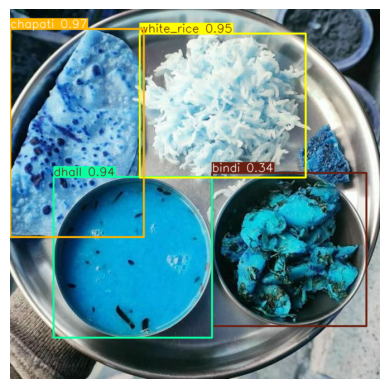


image 1/1 /content/food_calorie_detection-4/test/images/img-21_jpg.rf.7f925f13b18a55254eec0e78db7c3cc3.jpg: 640x640 1 chapati, 2 white_rices, 63.2ms
Speed: 3.6ms preprocess, 63.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


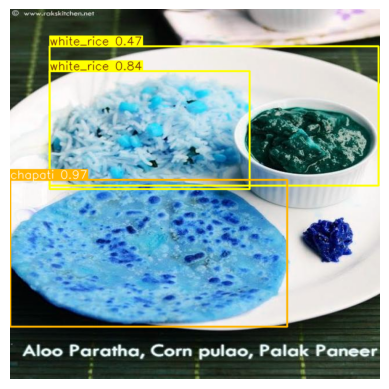


image 1/1 /content/food_calorie_detection-4/test/images/img-56_jpg.rf.0042ca83d08510beb9acbe40fa9b2a43.jpg: 640x640 1 cabbage, 2 potatos, 1 sambar, 1 white_rice, 62.9ms
Speed: 2.3ms preprocess, 62.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


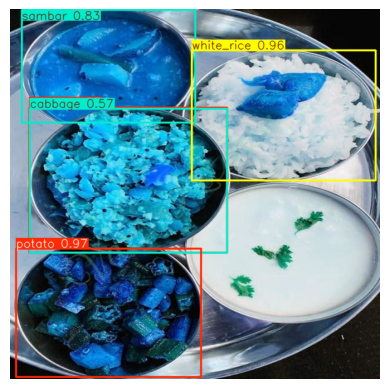


image 1/1 /content/food_calorie_detection-4/test/images/img-16_jpg.rf.952a626bd794218b864fcf975226843b.jpg: 640x640 1 sambar, 2 vadas, 1 white_rice, 62.4ms
Speed: 2.4ms preprocess, 62.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


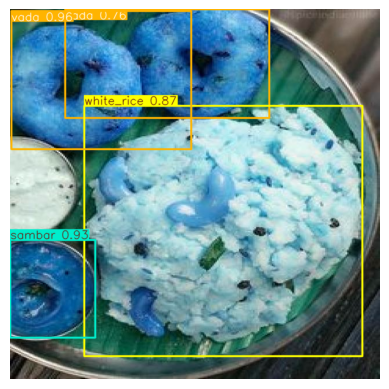

In [8]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

# Load your trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Function to display image with results
def plot_image_with_results(results):
    # Plot the image with segmentation results using matplotlib
    plt.imshow(results[0].plot())  # This will draw boxes and masks on the image
    plt.axis('off')  # Hide axes
    plt.show()

# Path to the folder where your test images are stored
test_folder = '/content/food_calorie_detection-4/test/images/'

# Get a list of all image files in the test folder
test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Path to the folder where you want to save the results
output_folder = '/content/results/'

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to save image with results
def save_image_with_results(results, output_folder, image_name):
    # Save the rendered result
    save_path = os.path.join(output_folder, image_name)
    results[0].save(save_path)  # Save the result

# Perform inference on each test image, display, and save results
for image_path in test_images:
    # Perform inference
    results = model(image_path)

    # Save the result image to output folder
    image_name = os.path.basename(image_path)
    save_image_with_results(results, output_folder, image_name)

    # Optionally, display the result
    plot_image_with_results(results)


In [2]:
!pip install ultralytics
!pip install opencv-python matplotlib

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np


model = YOLO('/content/runs/detect/train/weights/best.pt')

# Attempt to export again
model.export(format='tflite')

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 268 layers, 68,174,607 parameters, 0 gradients, 257.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 57, 8400) (130.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.17.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.35...
ONNX: export success ✅ 13.7s, saved as '/content/runs/detect/train/weights/best.onnx' (260.4 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 195.7s, saved as '/content/runs/detect/train/weights/best_saved_model' (651.1 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/train/weights/best_saved_model/best_float32.tflite' (260.3 MB)

Export complete (206.6s)
Results saved to /c

'/content/runs/detect/train/weights/best_saved_model/best_float32.tflite'

In [ ]:
import shutil
from google.colab import files

# Path to the folder you want to download
folder_to_zip = '/content/runs'

# Name of the zip file you want to create
output_filename = 'runs.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped file
files.download(output_filename)


In [10]:
import shutil
from google.colab import files

# Path to the folder you want to download
folder_to_zip = '/content/results'

# Name of the zip file you want to create
output_filename = 'results_test.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped file
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>